## DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox

In [2]:
train = pd.read_csv("C:/Users/chand/Downloads/L&T/train_aox2Jxw/train.csv")
test =  pd.read_csv("C:/Users/chand/Downloads/L&T/test_bqCt9Pv.csv")

In [3]:
## Combining Datasets
y = train.loan_default
train_id = train.UniqueID
train = train.drop(labels=["loan_default"],axis = 1)
print(train.shape)

(233154, 40)


In [4]:
df = pd.concat([train,test])
print(df.shape)

(345546, 40)


In [5]:
print('Loan default rate in first EMI is:', format(y.sum()/train.shape[0]))

Loan default rate in first EMI is: 0.2170711203753742


In [6]:
# Removing spaces and dot in  column names
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_').str.replace('(', '').str.replace(')', '')
train.columns = train.columns.str.strip().str.lower().str.replace('.', '_').str.replace('(', '').str.replace(')', '')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueid,345546.0,593106.042648,1.014816e+05,417428.00,505386.25,592918.50,680501.75,7.699090e+05
disbursed_amount,345546.0,54916.377391,1.304596e+04,11613.00,47645.00,54303.00,60947.00,9.905720e+05
asset_cost,345546.0,76294.838650,1.873864e+04,37000.00,66282.00,71541.00,79605.00,1.628992e+06
ltv,345546.0,74.929910,1.131522e+01,10.03,69.28,77.14,83.69,9.500000e+01
branch_id,345546.0,74.876752,7.042623e+01,1.00,15.00,64.00,135.00,2.610000e+02
supplier_id,345546.0,19705.205342,3.513985e+03,10524.00,16565.00,20470.00,23049.00,2.490100e+04
manufacturer_id,345546.0,68.812725,2.214213e+01,45.00,45.00,86.00,86.00,1.560000e+02
current_pincode_id,345546.0,3272.345381,2.240490e+03,1.00,1449.00,2790.00,5458.00,7.345000e+03
state_id,345546.0,7.247122,4.547494e+00,1.00,4.00,6.00,10.00,2.200000e+01
employee_code_id,345546.0,1621.741403,1.024409e+03,1.00,737.00,1511.00,2470.00,3.923000e+03


## EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1]), <a list of 2 Text xticklabel objects>)

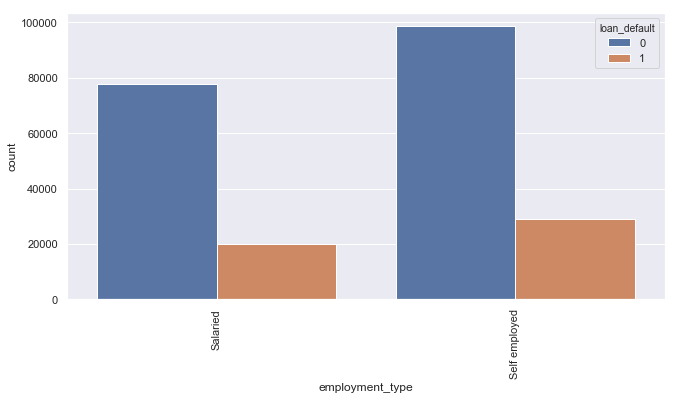

In [9]:
## count of employment_type
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.countplot(train.employment_type,hue=y)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

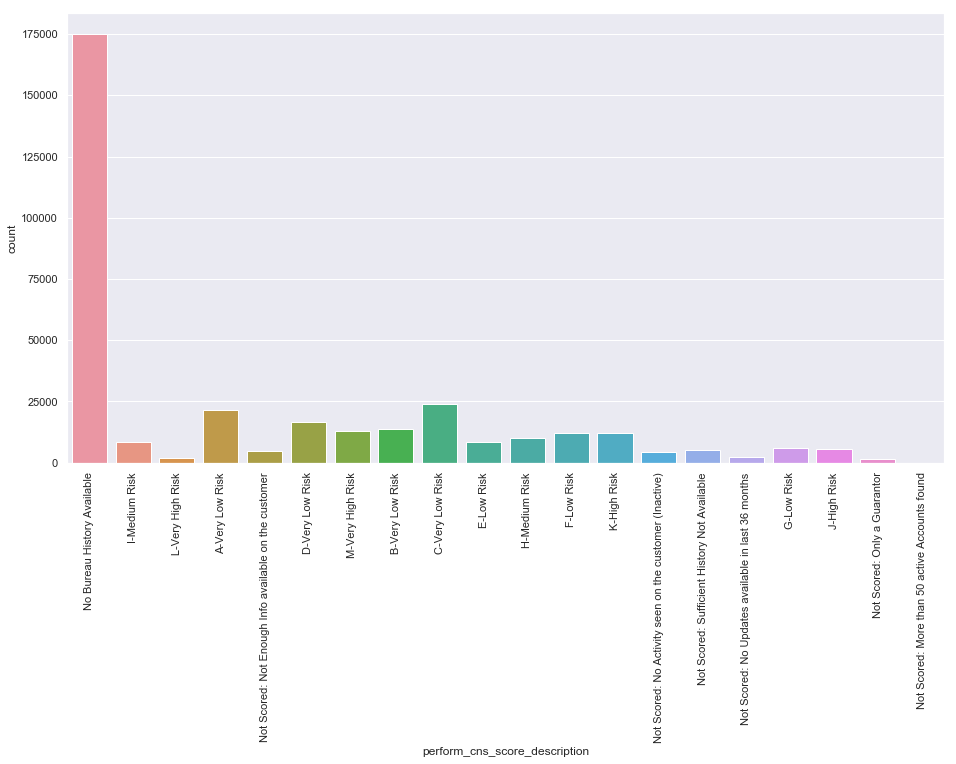

In [10]:
## count of perform_cns_score_description
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(df.perform_cns_score_description)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

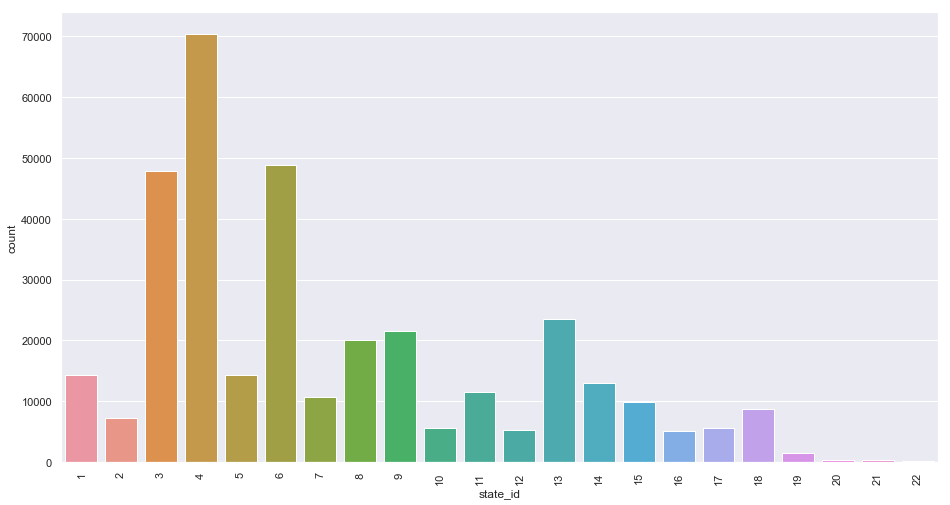

In [11]:
## STATE_ID
sns.countplot(df.state_id)
plt.xticks(rotation = 90)

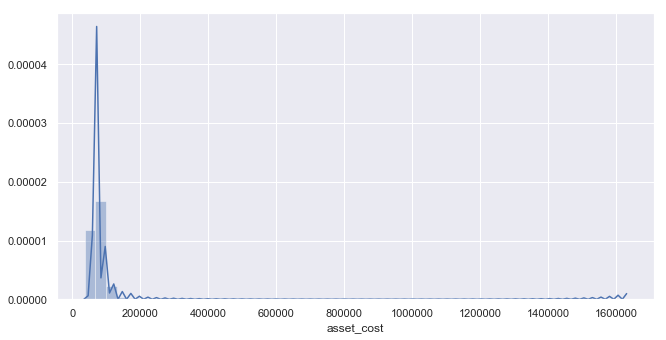

In [12]:
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.distplot(df["asset_cost"])

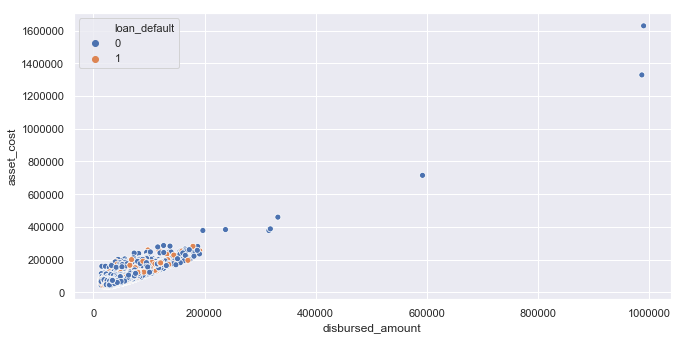

In [13]:
sns.scatterplot(y=train.asset_cost, x=train.disbursed_amount,hue=y)

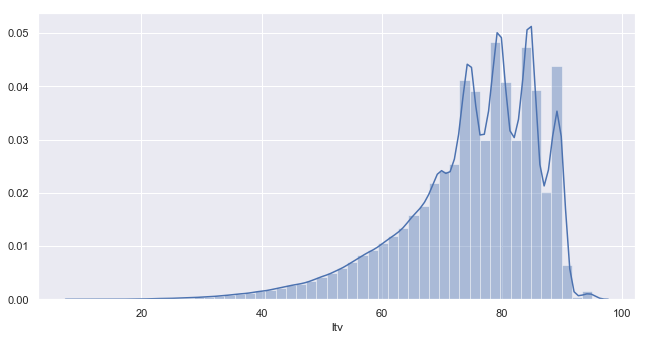

In [14]:
sns.distplot(df.ltv)

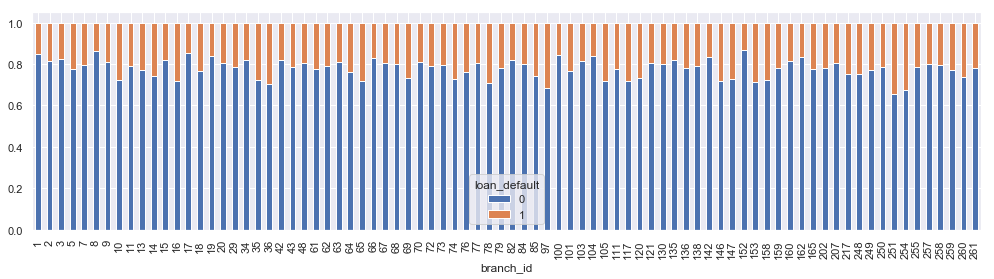

In [15]:
ct = pd.crosstab(train.branch_id,y)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

In [16]:
train.supplier_id.nunique()

2953

In [17]:
train.manufacturer_id.nunique()

11

(464.69764016358414,
 1.5277380091688753e-93,
 10,
 array([[4.43341307e+04, 1.22918693e+04],
        [1.30827416e+04, 3.62725842e+03],
        [8.00153315e+03, 2.21846685e+03],
        [2.12987972e+04, 5.90520276e+03],
        [1.88294396e+03, 5.22056045e+02],
        [8.57573319e+04, 2.37766681e+04],
        [7.56152712e+03, 2.09647288e+03],
        [6.09118668e+02, 1.68881332e+02],
        [4.69757328e+00, 1.30242672e+00],
        [9.39514656e+00, 2.60485344e+00],
        [7.82928880e-01, 2.17071120e-01]]))

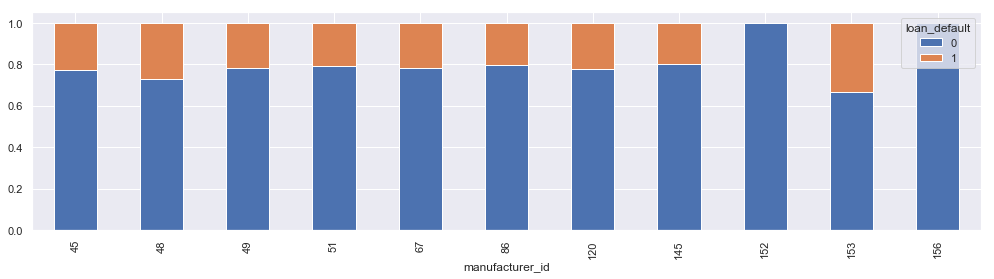

In [18]:
ct=pd.crosstab(train.manufacturer_id,y)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

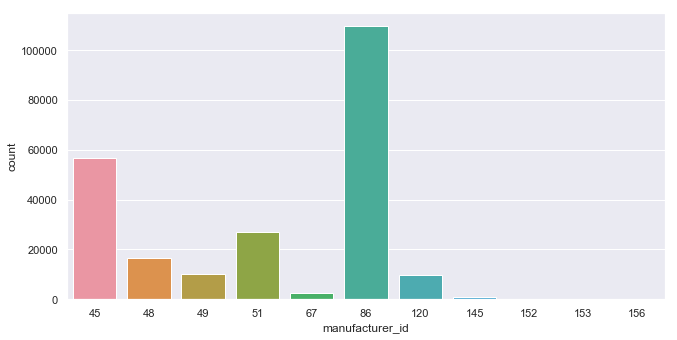

In [19]:
sns.countplot(train.manufacturer_id)

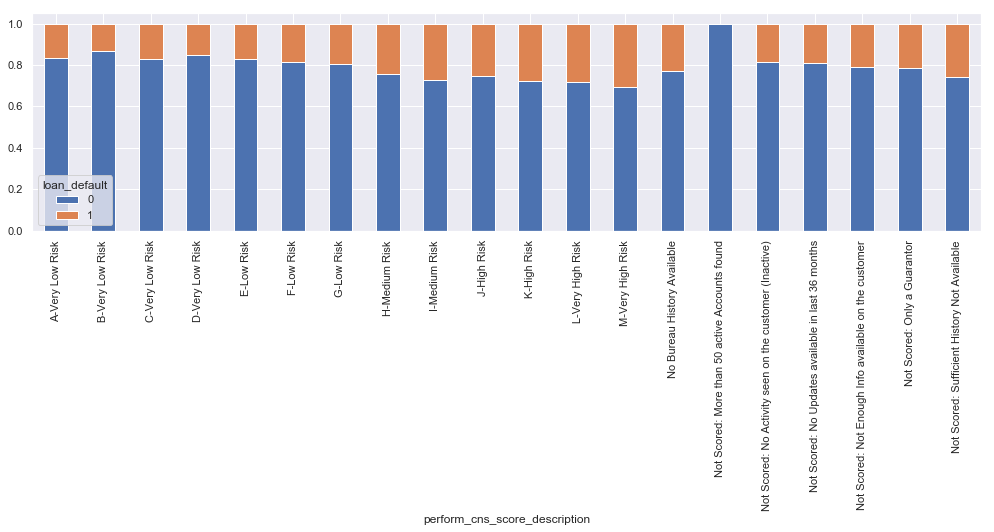

In [20]:
ct=pd.crosstab(train['perform_cns_score_description'], y)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

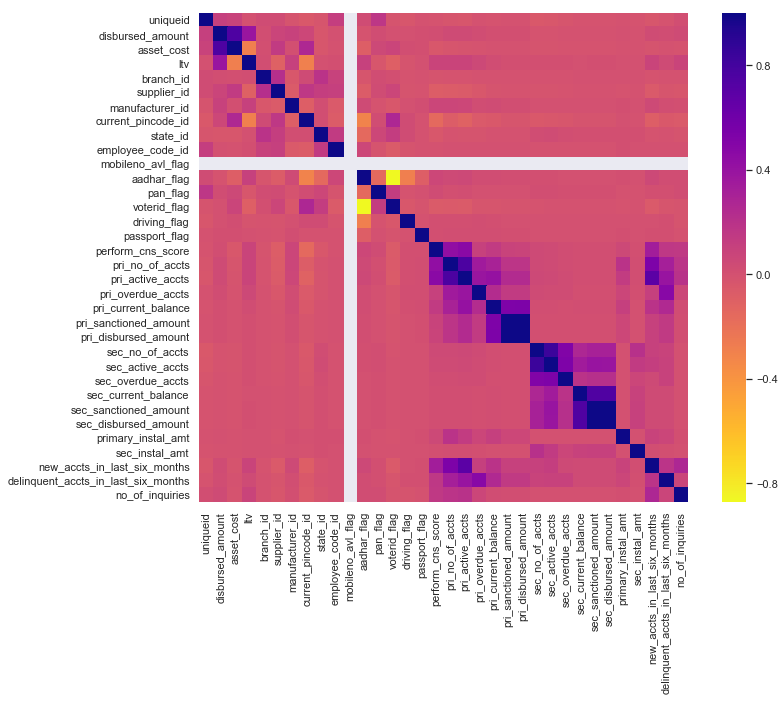

In [21]:
## Correlation Matrix
corrmat=df.corr()
colormap=plt.cm.plasma_r
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,cmap=colormap)

## Changing all Date columns to valid numerical columns

In [22]:
## Changing date_of_birth to age in years of customer
from datetime import datetime
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"],format ='%d-%m-%y' )
df["date_of_birth"].head(10)

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-12-09
5   1990-09-08
6   1988-06-01
7   1989-10-04
8   1991-11-15
9   2068-06-01
Name: date_of_birth, dtype: datetime64[ns]

Year 2000 (Y2K) issues: Python depends on the platform’s C library, which generally doesn’t have year 2000 issues, since all dates and times are represented internally as seconds since the epoch. Function strptime() can parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

In [23]:
## Fixing above issue of date
from datetime import timedelta, date
col = 'date_of_birth'
df[col] = pd.to_datetime(df[col])
future = df[col] >= date(year=2000,month=1,day=1)
df.loc[future, col] -= timedelta(days=365.25*100)

C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


In [24]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 
df["age"] = df["date_of_birth"].apply(calculateAge)
df = df.drop(labels=["date_of_birth"],axis = 1)      

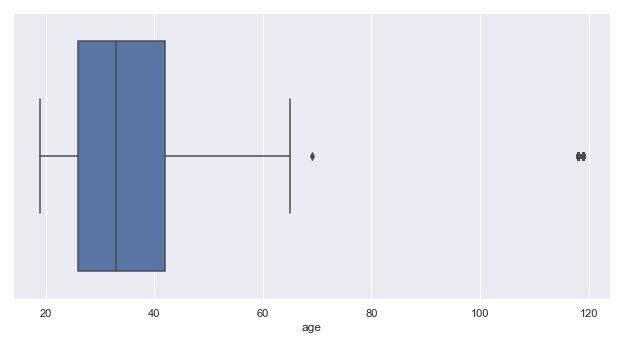

In [25]:
sns.boxplot(df["age"])

In [26]:
## Fixing age more than 100
def fix_age(age):
    if age > 100:
        age  = age - 100
    return age

In [27]:
df["age"] = df["age"].apply(fix_age)

In [28]:
## Changing disbursal_date in days
df["disbursaldate"] = pd.to_datetime(df["disbursaldate"],format ='%d-%m-%y' )

In [29]:
df["disbursaldate"].describe()

count                  345546
unique                    111
top       2018-10-31 00:00:00
freq                     8826
first     2018-08-01 00:00:00
last      2018-11-30 00:00:00
Name: disbursaldate, dtype: object

In [30]:
def Calculate_age_days(date):
    today = datetime.now()
    age = today-date
    age = age.days
    return age
df["disbursaldate"] = df["disbursaldate"].apply(Calculate_age_days) 

## Changing Credit history and account age to proper format

In [31]:
df["average_acct_age"].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: average_acct_age, dtype: object

In [32]:
df["credit_history_length"].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: credit_history_length, dtype: object

In [33]:
import re
def fix_format(text):
    match = re.findall(r'\d+',text)
    match = [int(i) for i in match]
    total  = match[0]*12 + match[1]
    return total

In [34]:
df["average_acct_age"] = df["average_acct_age"].apply(fix_format)
df["credit_history_length"] = df["credit_history_length"].apply(fix_format)
df["average_acct_age"].head()

0     0
1    23
2     0
3     8
4     0
Name: average_acct_age, dtype: int64

## Filling missing values

In [35]:
## Filling employment_type using others
pd.value_counts(df["employment_type"])

Self employed    187429
Salaried         147013
Name: employment_type, dtype: int64

In [36]:
df["employment_type"] = df["employment_type"].fillna("others")

## Removing unnecessary features

In [37]:
## Removing highly correlated variables pri_disbursed_amount and sec_disbursed_amount
df = df.drop(["pri_disbursed_amount","sec_disbursed_amount"],axis=1)

In [38]:
pd.value_counts(df["mobileno_avl_flag"])
## No variation thus removing it

1    345546
Name: mobileno_avl_flag, dtype: int64

In [39]:
df = df.drop(["mobileno_avl_flag","uniqueid"],axis=1)

## Checking skewness and applying transformation

In [40]:
cols = df.select_dtypes(["int64","float64"]).columns

In [41]:
skewness = df[cols].skew()

In [42]:
highly_skewed = []
for i in range(len(skewness)):
    if skewness[i] > 1 or skewness[i] < -1:
        highly_skewed.append(skewness.index[i])

In [43]:
highly_skewed

['disbursed_amount',
 'asset_cost',
 'ltv',
 'aadhar_flag',
 'pan_flag',
 'voterid_flag',
 'driving_flag',
 'passport_flag',
 'pri_no_of_accts',
 'pri_active_accts',
 'pri_overdue_accts',
 'pri_current_balance',
 'pri_sanctioned_amount',
 'sec_no_of_accts',
 'sec_active_accts',
 'sec_overdue_accts',
 'sec_current_balance',
 'sec_sanctioned_amount',
 'primary_instal_amt',
 'sec_instal_amt',
 'new_accts_in_last_six_months',
 'delinquent_accts_in_last_six_months',
 'average_acct_age',
 'credit_history_length',
 'no_of_inquiries']

In [44]:
## Removing binaries variables from highly_skewed
highly_skewed.remove('aadhar_flag')
highly_skewed.remove('pan_flag')
highly_skewed.remove('voterid_flag')
highly_skewed.remove('passport_flag')
highly_skewed.remove('driving_flag')

In [45]:
highly_skewed

['disbursed_amount',
 'asset_cost',
 'ltv',
 'pri_no_of_accts',
 'pri_active_accts',
 'pri_overdue_accts',
 'pri_current_balance',
 'pri_sanctioned_amount',
 'sec_no_of_accts',
 'sec_active_accts',
 'sec_overdue_accts',
 'sec_current_balance',
 'sec_sanctioned_amount',
 'primary_instal_amt',
 'sec_instal_amt',
 'new_accts_in_last_six_months',
 'delinquent_accts_in_last_six_months',
 'average_acct_age',
 'credit_history_length',
 'no_of_inquiries']

In [46]:
skewness[skewness > 1]

disbursed_amount                         4.392039
asset_cost                               5.887741
pan_flag                                 2.439907
voterid_flag                             2.109590
driving_flag                             6.661568
passport_flag                           21.977403
pri_no_of_accts                          8.626710
pri_active_accts                         4.943217
pri_overdue_accts                        7.244018
pri_current_balance                     29.300620
pri_sanctioned_amount                  343.959361
sec_no_of_accts                         32.349928
sec_active_accts                        32.529172
sec_overdue_accts                       27.075461
sec_current_balance                    123.160784
sec_sanctioned_amount                  133.045190
primary_instal_amt                     247.272779
sec_instal_amt                         199.360361
new_accts_in_last_six_months             4.911228
delinquent_accts_in_last_six_months      7.003852


In [47]:
## applying log transformation to highly skewed variables
log_transformation = []
for i in highly_skewed:
    print(i)
    log_transformation.append(skew(np.log1p(df[i])))
print(log_transformation)

disbursed_amount
asset_cost
ltv
pri_no_of_accts
pri_active_accts
pri_overdue_accts
pri_current_balance
pri_sanctioned_amount


C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log1p
  """
C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


sec_no_of_accts
sec_active_accts
sec_overdue_accts
sec_current_balance
sec_sanctioned_amount
primary_instal_amt
sec_instal_amt
new_accts_in_last_six_months
delinquent_accts_in_last_six_months
average_acct_age
credit_history_length
no_of_inquiries
[-0.4501215601920292, 1.3141534330924416, -1.8859478874420368, 1.0451533824790324, 1.1841677445148378, 3.1760825706798914, nan, nan, 9.755600938401226, 11.357348517659144, 17.088376188515888, nan, 8.837347581738806, 0.9448985849072126, 11.78439264917357, 2.1193992139963242, 3.784639005260333, 0.45478507491374554, 0.4460194096938307, 2.955288218996522]


In [48]:
pd.DataFrame(log_transformation,highly_skewed,columns=["feat_name"]).reset_index()

,index,feat_name
0,disbursed_amount,-0.450122
1,asset_cost,1.314153
2,ltv,-1.885948
3,pri_no_of_accts,1.045153
4,pri_active_accts,1.184168
5,pri_overdue_accts,3.176083
6,pri_current_balance,NaN
7,pri_sanctioned_amount,NaN
8,sec_no_of_accts,9.755601
9,sec_active_accts,11.357349


In [49]:
## applying log_transformation on positive variables
df["disbursed_amount"] = np.log1p(df["disbursed_amount"])
df["asset_cost"] = np.log1p(df["asset_cost"])
df["pri_no_of_accts"] = np.log1p(df["pri_no_of_accts"])
df["pri_active_accts"] = np.log1p(df["pri_active_accts"])
df["pri_overdue_accts"] = np.log1p(df["pri_overdue_accts"])
df["sec_no_of_accts"] = np.log1p(df["pri_active_accts"])
df["sec_active_accts"] = np.log1p(df["sec_active_accts"])
df["sec_overdue_accts"] = np.log1p(df["sec_overdue_accts"])
df["sec_sanctioned_amount"] = np.log1p(df["sec_sanctioned_amount"])
df["primary_instal_amt"] = np.log1p(df["primary_instal_amt"])
df["sec_instal_amt"] = np.log1p(df["sec_instal_amt"])
df["new_accts_in_last_six_months"] = np.log1p(df["new_accts_in_last_six_months"])
df["delinquent_accts_in_last_six_months"] = np.log1p(df["delinquent_accts_in_last_six_months"])
df["average_acct_age"] = np.log1p(df["average_acct_age"])
df["credit_history_length"] = np.log1p(df["credit_history_length"])
df["no_of_inquiries"] = np.log1p(df["no_of_inquiries"])

In [50]:
## Dealing with variables that are highly skewed and contains negative data
## Transforming these also to log and imputing missing values with zero
def fix_var(bal):
    if bal < 0:
        bal =0
    return bal
df["pri_current_balance"] = df["pri_current_balance"].apply(fix_var)
df["pri_sanctioned_amount"] = df["pri_sanctioned_amount"].apply(fix_var)
df["sec_current_balance"] = df["sec_current_balance"].apply(fix_var)

In [51]:
df["pri_current_balance"] = np.log1p(df["pri_current_balance"])
df["pri_sanctioned_amount"] = np.log1p(df["pri_sanctioned_amount"])
df["sec_current_balance"] = np.log1p(df["sec_current_balance"])

# Encoding features 

In [52]:
pd.value_counts(df["perform_cns_score_description"])

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [53]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["perform_cns_score_description"] =lb.fit_transform(df["perform_cns_score_description"])

In [54]:
df['current_pincode_id']=df['current_pincode_id'].astype(np.object)
df['employee_code_id']=df['employee_code_id'].astype(np.object)
df['branch_id']=df['branch_id'].astype(np.object)
df['manufacturer_id']=df['manufacturer_id'].astype(np.object)
df['supplier_id']=df['supplier_id'].astype(np.object)

## Separating training data and test data

In [55]:
X = df[0:len(train)]
test = df[len(train):]

## Model Training

## Training catboost

In [56]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import auc 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify = y)

  colsample_bytree=0.8, gamma=5, learning_rate=0.2920, max_depth=3, min_child_weight=5,
    n_estimators=8694, subsample=1.0

In [58]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([ 3,  4,  5,  6,  7, 10], dtype=int64)

## Hyperparameter Learning rate

In [59]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994,
                 early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405,
                          n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, 
                                                                                        time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [60]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

0:	test: 0.5859947	best: 0.5859947 (0)
100:	test: 0.6675999	best: 0.6675999 (100)
200:	test: 0.6711022	best: 0.6711022 (200)
300:	test: 0.6720047	best: 0.6720154 (298)
400:	test: 0.6724672	best: 0.6724672 (400)
500:	test: 0.6729185	best: 0.6729185 (500)
600:	test: 0.6730714	best: 0.6731172 (576)
Stopped by overfitting detector  (30 iterations wait)
0:	test: 0.5859947	best: 0.5859947 (0)
100:	test: 0.6568355	best: 0.6568355 (100)
200:	test: 0.6641862	best: 0.6641862 (200)
300:	test: 0.6669193	best: 0.6669193 (300)
400:	test: 0.6687872	best: 0.6687872 (400)
500:	test: 0.6704506	best: 0.6704506 (500)
600:	test: 0.6713058	best: 0.6713058 (600)
700:	test: 0.6718477	best: 0.6718477 (700)
800:	test: 0.6722538	best: 0.6722538 (800)
900:	test: 0.6726379	best: 0.6726391 (898)
999:	test: 0.6728942	best: 0.6728942 (999)	total: 27m 3s	remaining: 0us
0:	test: 0.5859947	best: 0.5859947 (0)
Stopped by overfitting detector  (30 iterations wait)
0:	test: 0.5859947	best: 0.5859947 (0)
Stopped by overfitt

C:\Users\chand\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	test: 0.5859947	best: 0.5859947 (0)
Stopped by overfitting detector  (30 iterations wait)
optimal_parameters: {'learning_rate': 0.11389587749465084}
optimal score: 0.98638437925522
optimization time: 8390.60384464264
updating model with optimal values


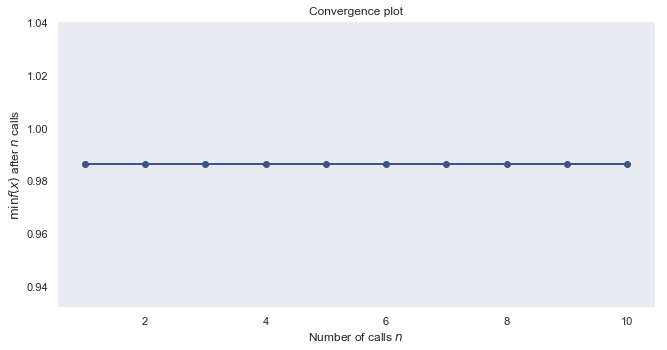

In [61]:
cb = catboost.CatBoostClassifier(n_estimators=1000, # use large n_estimators deliberately to make use of the early stopping
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=1994, 
                         use_best_model=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

## EVALUATION

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
m=CatBoostClassifier(n_estimators=1000,random_state=1994,eval_metric='AUC',max_depth=6,learning_rate=0.113,od_wait=50
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
p2=m.predict_proba(X_test)[:,-1]

0:	test: 0.5284830	test1: 0.5332852	best: 0.5332852 (0)	total: 282ms	remaining: 4m 42s
100:	test: 0.7000682	test1: 0.6541439	best: 0.6541439 (100)	total: 26.7s	remaining: 3m 57s
200:	test: 0.7163438	test1: 0.6753724	best: 0.6753724 (200)	total: 1m 3s	remaining: 4m 11s
300:	test: 0.7228375	test1: 0.6776496	best: 0.6776627 (295)	total: 1m 41s	remaining: 3m 54s
400:	test: 0.7268618	test1: 0.6784205	best: 0.6784747 (373)	total: 2m 19s	remaining: 3m 27s
500:	test: 0.7318108	test1: 0.6787918	best: 0.6788047 (497)	total: 2m 57s	remaining: 2m 56s
600:	test: 0.7350200	test1: 0.6788613	best: 0.6790334 (528)	total: 3m 37s	remaining: 2m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6790334375
bestIteration = 528

Shrink model to first 529 iterations.


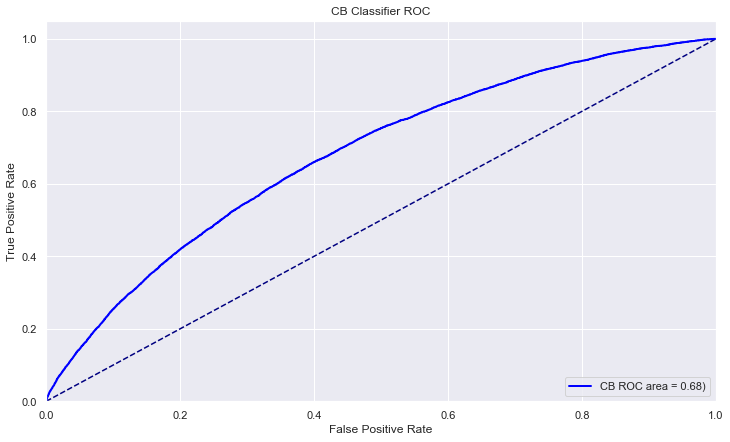

In [101]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,m.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure(figsize=(12,7))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('CB Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='CB ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [92]:
feature_score = pd.DataFrame(sorted(zip(m.feature_importances_,X_train.columns),reverse=True),columns=["Score","Feature"])

In [98]:
feature_score.head()

,Score,Feature
0,10.392848,ltv
1,7.991538,supplier_id
2,7.195738,disbursed_amount
3,6.910164,disbursaldate
4,6.537355,perform_cns_score


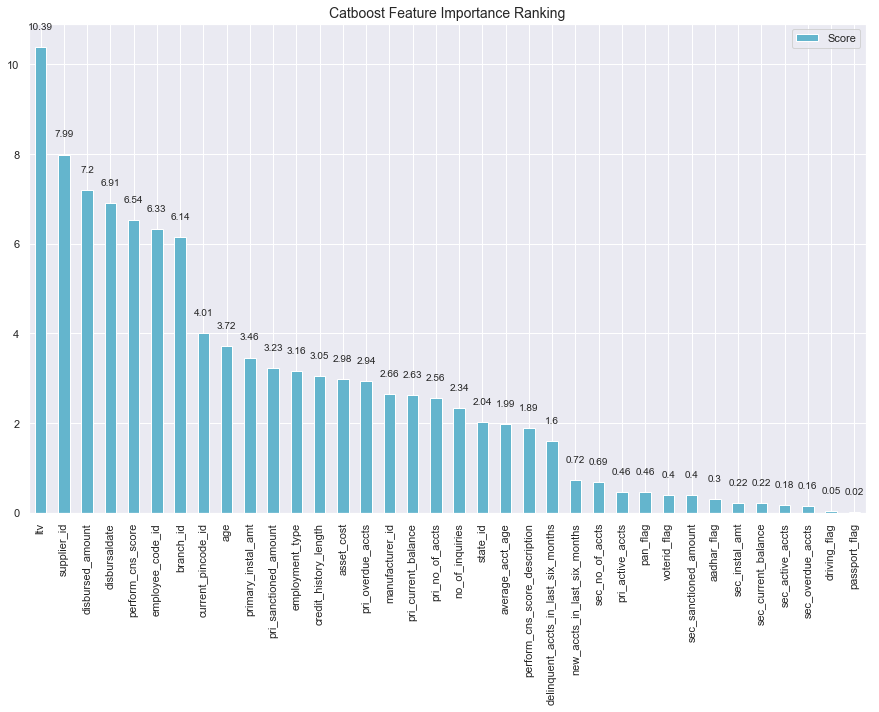

In [97]:
plt.rcParams["figure.figsize"] = (15,9)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [100]:
## Sample_Submission
sample = pd.read_csv("C:/Users/chand/Downloads/L&T/sample_submission_24jSKY6.csv")
pred_cb = m.predict_proba(test)[:,1]
sample["loan_default"] = pred_cb
sample.to_csv('subm_l&T.csv',index = False)

## Thanks AV For Hackathon